In [ ]:
import pandas as pd
import gc
from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/MyDrive/부트캠프/'
data_path = data_root + '11_파이널/'

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/utils/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [ ]:
# df31 = pd.read_parquet(data_path + 'train/3.승인매출정보/201807_train_승인매출정보.parquet')
# df32 = pd.read_parquet(data_path + 'train/3.승인매출정보/201808_train_승인매출정보.parquet')
# df33 = pd.read_parquet(data_path + 'train/3.승인매출정보/201809_train_승인매출정보.parquet')
# df34 = pd.read_parquet(data_path + 'train/3.승인매출정보/201810_train_승인매출정보.parquet')
df35 = pd.read_parquet(data_path + 'train/3.승인매출정보/201811_train_승인매출정보.parquet')
df36 = pd.read_parquet(data_path + 'train/3.승인매출정보/201812_train_승인매출정보.parquet')

In [ ]:
df31 = pd.read_parquet(data_path + 'test/3.승인매출정보/201807_test_승인매출정보.parquet')
df32 = pd.read_parquet(data_path + 'test/3.승인매출정보/201808_test_승인매출정보.parquet')
df33 = pd.read_parquet(data_path + 'test/3.승인매출정보/201809_test_승인매출정보.parquet')
df34 = pd.read_parquet(data_path + 'test/3.승인매출정보/201810_test_승인매출정보.parquet')
df35 = pd.read_parquet(data_path + 'test/3.승인매출정보/201811_test_승인매출정보.parquet')
df36 = pd.read_parquet(data_path + 'test/3.승인매출정보/201812_test_승인매출정보.parquet')

In [ ]:
df3 = pd.concat([df31, df32, df33, df34, df35, df36])
del df31
del df32
del df33
del df34
del df35
del df36
gc.collect()

0

In [ ]:
col_to_drop = [3,4,5,6,7,8,2, 9, 10, 37, 38, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,225,262,263,270,377,378,379,380,280,281,282,283,294,295,296,297,371,372]
df3.drop(columns=df3.columns[col_to_drop], inplace=True, axis=1)

In [ ]:
d3 = df3.describe()
d3m = d3.loc['min', :]
print(d3m.sort_values(ascending=False))
d3m = d3.loc['max', :]
print(d3m.sort_values(ascending=False))

기준년월              201807.0
RP후경과월_건강              6.0
RP후경과월_유선방송            6.0
최종카드론_금융상환방식코드         2.0
이용금액_오프라인_R6M          0.0
                    ...   
증감_RP건수_전월            -4.0
이용금액_체크_R12M        -414.0
이용금액_체크_B0M        -1380.0
이용금액_일시불_B0M       -2754.0
이용금액_일시불_R12M      -4501.0
Name: min, Length: 283, dtype: float64
카드론이용금액_누적         1903389.0
이용금액_CA_R12M        960000.0
이용금액_일시불_R12M       937176.0
이용금액_오프라인_R6M       800949.0
최대이용금액_일시불_R12M     432358.0
                     ...    
이용금액_당사기타_B0M            0.0
이용금액_당사기타_R3M            0.0
승인거절건수_입력오류_B0M          0.0
승인거절건수_기타_B0M            0.0
승인거절건수_입력오류_R3M          0.0
Name: max, Length: 283, dtype: float64


In [809]:
df3[df3.select_dtypes(include='int64').columns] = df3.select_dtypes(include='int64').astype('int32')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 174 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(172), object(1)
memory usage: 2.0+ GB


In [ ]:
df3.to_parquet(data_path + 'processed/df3_0.parquet')

In [ ]:
df12 = pd.read_parquet(data_path + 'processed/df3_12.parquet')
df34 = pd.read_parquet(data_path + 'processed/df3_34.parquet')
df56 = pd.read_parquet(data_path + 'processed/df3_56.parquet')
df0 = pd.read_parquet(data_path + 'processed/df3_0.parquet')
df3 = pd.concat([df12, df34, df56, df0])
del df12
del df34
del df56
del df0

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 99999
Columns: 301 entries, 기준년월 to 이용금액대
dtypes: float64(2), int32(281), object(18)
memory usage: 3.6+ GB


In [ ]:
df3.to_parquet(data_path + 'processed/df3.parquet', index=False)
gc.collect()

5588

In [ ]:
nasorts = df3.isna().sum().sort_values(ascending=False).head(17)

In [ ]:
nasorts

,0
_3순위여유업종,2972290
_3순위납부업종,2888898
_2순위여유업종,2878107
_3순위교통업종,2556184
_2순위납부업종,2543911
_1순위여유업종,2485573
최종카드론_신청경로코드,2448009
최종카드론_금융상환방식코드,2447897
_2순위교통업종,2071153
_3순위쇼핑업종,1643222


In [ ]:
nasorts.index

Index(['_3순위여유업종', '_3순위납부업종', '_2순위여유업종', '_3순위교통업종', '_2순위납부업종', '_1순위여유업종',
       '최종카드론_신청경로코드', '최종카드론_금융상환방식코드', '_2순위교통업종', '_3순위쇼핑업종', '_1순위납부업종',
       '_1순위교통업종', '_2순위쇼핑업종', '_3순위업종', '_1순위쇼핑업종', '_2순위업종', '_1순위업종'],
      dtype='object')

In [ ]:
df3.drop(columns=nasorts.index, inplace=True, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000000 entries, 0 to 99999
Columns: 284 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(281), object(2)
memory usage: 3.2+ GB


In [ ]:
df3 = pd.read_parquet(data_path + 'processed/df3.parquet')

In [ ]:
d3 = df3.describe()
d3m = d3.loc['min', :]
d3x = d3.loc['max', :]

In [ ]:
d3m = d3m - d3x
d3m = d3m.sort_values(ascending=False)
d3m.head()

,0
할부금액_부분_3M_R12M,0.0
RP건수_건강_B0M,0.0
할부건수_부분_14M_R12M,0.0
할부건수_부분_3M_R12M,0.0
증감_RP건수_유선방송_전월,0.0


In [ ]:
mmi =  d3m.head(29).index
mmi

Index(['할부금액_부분_3M_R12M', 'RP건수_건강_B0M', '할부건수_부분_14M_R12M', '할부건수_부분_3M_R12M',
       '증감_RP건수_유선방송_전월', '납부_건강연금이용금액', '납부_렌탈료이용금액', '이용금액_당사페이_B0M',
       '납부_유선방송이용금액', '증감_RP건수_건강_전월', '이용금액_당사기타_R6M', '이용금액_부분무이자_B0M',
       '이용금액_당사페이_R6M', '이용금액_당사기타_R3M', '이용건수_당사페이_R6M', '이용건수_당사페이_R3M',
       '이용금액_당사기타_B0M', '이용건수_부분무이자_B0M', '이용금액_당사페이_R3M', '여유_여행이용금액',
       '이용건수_당사기타_B0M', '이용건수_당사기타_R3M', '이용건수_당사기타_R6M', '이용건수_당사페이_B0M',
       '승인거절건수_입력오류_B0M', '승인거절건수_기타_B0M', '이용개월수_당사페이_R6M', '할부건수_부분_6M_R12M',
       'RP건수_유선방송_B0M'],
      dtype='object')

In [ ]:
for m in mmi:
    print(m, len(df3[m].unique()))

할부금액_부분_3M_R12M 1
RP건수_건강_B0M 1
할부건수_부분_14M_R12M 1
할부건수_부분_3M_R12M 1
증감_RP건수_유선방송_전월 1
납부_건강연금이용금액 1
납부_렌탈료이용금액 1
이용금액_당사페이_B0M 1
납부_유선방송이용금액 1
증감_RP건수_건강_전월 1
이용금액_당사기타_R6M 1
이용금액_부분무이자_B0M 1
이용금액_당사페이_R6M 1
이용금액_당사기타_R3M 1
이용건수_당사페이_R6M 1
이용건수_당사페이_R3M 1
이용금액_당사기타_B0M 1
이용건수_부분무이자_B0M 1
이용금액_당사페이_R3M 1
여유_여행이용금액 1
이용건수_당사기타_B0M 1
이용건수_당사기타_R3M 1
이용건수_당사기타_R6M 1
이용건수_당사페이_B0M 1
승인거절건수_입력오류_B0M 1
승인거절건수_기타_B0M 1
이용개월수_당사페이_R6M 1
할부건수_부분_6M_R12M 1
RP건수_유선방송_B0M 1


In [ ]:
df3.drop(columns=mmi, inplace=True, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 255 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(252), object(2)
memory usage: 2.9+ GB


In [ ]:
del d3m
del d3x
del mmi
gc.collect()

11802

In [ ]:
y = pd.read_csv(data_path + 'processed/segment.csv')
y

,ID,Segment
0,TRAIN_000000,D
1,TRAIN_000001,E
2,TRAIN_000002,C
3,TRAIN_000003,D
4,TRAIN_000004,E
...,...,...
2399995,TRAIN_399995,E
2399996,TRAIN_399996,D
2399997,TRAIN_399997,C
2399998,TRAIN_399998,E


In [ ]:
dm = pd.get_dummies(y['Segment'])
y_train = y['Segment'].iloc[:2400000]

In [ ]:
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import chi2_contingency

 - index: 8, column: 이용건수_카드론_B0M - 값이 1인 열이 너무 적음
 - index: 15, column: 이용금액_카드론_B0M - 유의미한 값이 너무 적음
 - index: 20, column: 이용건수_부분무이자_R12M - 값이 다른 열이 너무 적음
 - index: 28, column: 이용금액_부분무이자_R12M - 유의미한 값이 너무 적음
 - index: 36, column: 최대이용금액_부분무이자_R12M - 유의미한 값이 너무 적음
 - index: 52, column: 교통_통행료이용금액 - 유의미한 값이 너무 적음
 - index: 64, column: 납부_관리비이용금액 - 유의미한 값이 너무 적음
 - index: 65, column: 납부_가스전기료이용금액 - 유의미한 값이 너무 적음
 - index: 85, column: 할부건수_12M_R12M - 유의미한 값이 너무 적음(30000)
 - index: 86, column: 할부건수_14M_R12M - 유의미한 값이 너무 적음
 - index: 92, column: 할부건수_유이자_6M_R12M - 설명력이 너무 약함
 - index: 93, column: 할부건수_유이자_12M_R12M - 설명력이 너무 약함
 - index: 94, column: 할부건수_유이자_14M_R12M - 설명력이 너무 약함
 - index: 97, column: 할부금액_유이자_12M_R12M - 유의미한 값이 너무 적음(60000)
 - index: 101, column: 할부건수_무이자_12M_R12M - 유의미한 값이 너무 적음(15000)
 - index: 102, column: 할부건수_무이자_14M_R12M -  유의미한 값이 없음
 - index: 106, column: 할부금액_무이자_14M_R12M - 유의미한 값이 너무 적음(10000)
 - index: 107, column: 할부건수_부분_12M_R12M - 유의미한 값이 너무 적음(500)
 - index: 108, column: 할부금액_부분_6M_R12M -  유의미한 값이 없음
 - index: 110, column: 할부금액_부분_14M_R12M - 유의미한 값이 없음
 - index: 116, column: RP건수_렌탈_B0M - 유의미한 값이 적음(10000)
 - index: 120, column: RP건수_학습비_B0M - 유의미한 값이 없음
 - index: 122~133 : RP건수가 적기에 후경과월을 제거
 - index: 124, column: RP후경과월_아파트 - 설명력이 너무 약함
 - index: 125, column: RP후경과월_제휴사서비스직접판매 - 설명력이 너무 약함
 - index: 126, column: RP후경과월_렌탈 - 유의미한 값이 적음(30000)
 - index: 127, column: RP후경과월_가스 - 유의미한 값이 적음(30000)
 - index: 128, column: RP후경과월_전기 - 유의미한 값이 적음(15000)
 - index: 129, column: RP후경과월_보험 - 유의미한 값이 적음(50000)
 - index: 130, column: RP후경과월_학습비 - 유의미한 값이 적음(5000)
 - index: 131, column: RP후경과월_유선방송 - 유의미한 값이 없음
 - index: 132, column: RP후경과월_건강 - 유의미한 값이 없음
 - index: 135, column: 증감_RP유형건수_전월 - 유의미한 값이 적음(50000)
 - index: 136, column: 증감_RP건수_통신_전월 - 유의미한 값이 적음(50000)
 - index: 137, column: 증감_RP건수_아파트_전월 - 유의미한 값이 적음(800)
 - index: 138, column: 증감_RP건수_제휴사서비스직접판매_전월 - 유의미한 값이 적음(2000)
 - index: 139, column: 증감_RP건수_렌탈_전월 - 유의미한 값이 적음(5000)
 - index: 140, column: 증감_RP건수_가스_전월 - 유의미한 값이 적음(5000)
 - index: 141, column: 증감_RP건수_전기_전월 - 유의미한 값이 적음(5000)
 - index: 142, column: 증감_RP건수_보험_전월 - 유의미한 값이 적음(10000)
 - index: 143, column: 증감_RP건수_학습비_전월 - 유의미한 값이 적음(1000)
 - index: 144, column: 증감_RP건수_교통_전월 - 설명력이 약함
 - index: 173, column: 이용개월수_당사기타_R6M - 유의미한 값이 적음(50000)
 - index: 175, column: 이용개월수_B페이_R6M - 설명력이 약함
 - index: 185, column: 이용건수_B페이_R6M - 설명력이 약함
 188~197: 3개월 데이터가 제거되지 않았음
 - index: 192, column: 이용금액_D페이_R3M - 유의미한 값이 적음(50000)
 - index: 197, column: 이용건수_D페이_R3M - 유의미한 값이 적음(30000)
 - index: 200, column: 이용금액_B페이_B0M - 유의미한 값이 적음(50000)
 - index: 202, column: 이용금액_D페이_B0M - 유의미한 값이 적음(30000)
 - index: 205, column: 이용건수_B페이_B0M - 유의미한 값이 적음(40000)
 - index: 207, column: 이용금액_D페이_B0M - 유의미한 값이 적음(10000)
 - 선결제_R3M 212 213 214 220, 221: 3개월데이터가 제거되지 않았음
 - index: 218, column: 이용횟수_연체_R6M - 설명력이 적음
 - index: 222, column: 이용횟수_연체_B0M - 유의미한 값이 적음(50000)
 - index: 236, column: 건수_할부전환_R6M - 유의미한 값이 적음(40000)
 - index: 237, column: 건수_할부전환_R3M - 유의미한 값이 적음(40000)
 - index: 238, column: 금액_할부전환_R6M - 유의미한 값이 적음(40000)
 - index: 239, column: 금액_할부전환_R3M - 유의미한 값이 적음(40000)
 - index: 243, column: 신청건수_ATM_CL_B0 - 유의미한 값이 없음
 - index: 245, column: 신청건수_ATM_CL_R6M - 유의미한 값이 없음
 - index: 246, column: 승인거절건수_B0M - 유의미한 값이 적음(4000)
 - index: 247, column: 승인거절건수_한도초과_B0M - 유의미한 값이 적음(4000)
 - index: 248, column: 승인거절건수_BL_B0M - 유의미한 값이 없음
 - index: 249, column: 승인거절건수_R3M - 설명력이 약함
 - index: 250~253: 설명력이 약함

In [805]:
i = 212
c = df3.columns[i]
d = df3.iloc[:,i]
# dmc = pd.concat([d,dm], axis=1)
print(i, c)
print(len(d.unique()))

212 이용횟수_선결제_R3M
9


In [802]:
train_d = d.iloc[:2400000]
train_d = pd.merge(train_d, dm, left_index=True, right_index=True)
train_d.corr()[c]

,이용금액대
이용금액대,1.000000
A,0.040844
B,0.015718
C,0.362548
D,0.412267
E,-0.570062


In [800]:
d.value_counts()

,count
이용금액대,
09.미사용,610887
05.10만원-,579313
02.50만원+,574778
01.100만원+,442685
04.10만원+,416275
03.30만원+,376062


In [801]:
encode = {
    '09.미사용': 0,
    '05.10만원-': 100,
    '02.50만원+': 5000,
    '01.100만원+': 10000,
    '04.10만원+': 1000,
    '03.30만원+': 3000,
}
d = d.map(encode)
d

,이용금액대
0,10000
1,3000
2,10000
3,10000
4,0
...,...
2999995,0
2999996,100
2999997,0
2999998,10000


In [806]:
col_to_drop = [8, 15, 20, 28, 36, 52, 64, 65, 85, 86, 92, 93, 94, 97, 101, 102, 106, 107, 108, 110, 116, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 173, 175, 185, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 202, 205, 207, 212, 213, 214, 220, 221, 222, 236, 237, 238, 239, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253]
df3.columns[col_to_drop]

Index(['이용건수_카드론_B0M', '이용금액_카드론_B0M', '이용건수_부분무이자_R12M', '이용금액_부분무이자_R12M',
       '최대이용금액_부분무이자_R12M', '교통_통행료이용금액', '납부_관리비이용금액', '납부_가스전기료이용금액',
       '할부건수_12M_R12M', '할부건수_14M_R12M', '할부건수_유이자_6M_R12M',
       '할부건수_유이자_12M_R12M', '할부건수_유이자_14M_R12M', '할부금액_유이자_12M_R12M',
       '할부건수_무이자_12M_R12M', '할부건수_무이자_14M_R12M', '할부금액_무이자_14M_R12M',
       '할부건수_부분_12M_R12M', '할부금액_부분_6M_R12M', '할부금액_부분_14M_R12M',
       'RP건수_렌탈_B0M', 'RP건수_학습비_B0M', 'RP후경과월', 'RP후경과월_통신', 'RP후경과월_아파트',
       'RP후경과월_제휴사서비스직접판매', 'RP후경과월_렌탈', 'RP후경과월_가스', 'RP후경과월_전기', 'RP후경과월_보험',
       'RP후경과월_학습비', 'RP후경과월_유선방송', 'RP후경과월_건강', 'RP후경과월_교통', '증감_RP유형건수_전월',
       '증감_RP건수_통신_전월', '증감_RP건수_아파트_전월', '증감_RP건수_제휴사서비스직접판매_전월',
       '증감_RP건수_렌탈_전월', '증감_RP건수_가스_전월', '증감_RP건수_전기_전월', '증감_RP건수_보험_전월',
       '증감_RP건수_학습비_전월', '증감_RP건수_교통_전월', '이용개월수_당사기타_R6M', '이용개월수_B페이_R6M',
       '이용건수_B페이_R6M', '이용금액_간편결제_R3M', '이용금액_A페이_R3M', '이용금액_B페이_R3M',
       '이용금액_C페이_R3M', '이용금액_D페이_R3M', '이용건수_간편결제_R3M', '이용건

In [807]:
df3.drop(columns=df3.columns[col_to_drop], inplace=True, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 174 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(171), int64(1), object(1)
memory usage: 2.0+ GB


In [810]:
train8 = df3.iloc[:2400000,:]
test8 = df3.iloc[2400000:,:]
train8.info()
test8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 174 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(172), object(1)
memory usage: 1.6+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 2400000 to 2999999
Columns: 174 entries, 기준년월 to 이용금액대
dtypes: float64(1), int32(172), object(1)
memory usage: 402.8+ MB


In [811]:
train8.to_parquet(data_path + 'processed/train3.parquet', index=False)
test8.to_parquet(data_path + 'processed/test3.parquet', index=False)

In [803]:
df3[c] = d

In [515]:
d.var()

1.127684514353848

In [781]:
d_train = d.iloc[:2400000]
# d_train과 y['Segment'] 수직병합
d_train = pd.merge(d_train, y_train, left_index=True, right_index=True)

In [782]:
d_train_spec = pd.merge(d_train[c], dm, left_index=True, right_index=True)
d_train_spec = d_train_spec[d_train_spec[c] != 0]
display(d_train_spec.corr()[c])
d_train_spec = d_train[d_train[c] != 0]

,승인거절건수_R3M
승인거절건수_R3M,1.000000
A,-0.008004
B,0.010222
C,0.035493
D,0.020911
E,-0.041884


In [580]:
pd.crosstab(d_train[c], d_train['Segment'], normalize='columns')

Segment,A,B,C,D,E
이용개월수_B페이_R6M,,,,,
0,0.939300,0.937500,0.936547,0.943380,0.981091
1,0.048354,0.048611,0.049659,0.046541,0.016160
2,0.005144,0.006944,0.006482,0.004306,0.001255
3,0.001029,0.000000,0.001105,0.001174,0.000338
4,0.000000,0.000000,0.001270,0.001037,0.000338
5,0.003086,0.006944,0.002030,0.001561,0.000376
6,0.003086,0.000000,0.002908,0.002001,0.000443


In [784]:
table = pd.crosstab(d_train_spec[c], d_train_spec['Segment'])
chi2, p, dof, expected = chi2_contingency(table, lambda_="log-likelihood", correction=False)

print(f"Chi2: {chi2}, p-value: {p}")
print(f"expected < 5: {(expected < 5)}")

Chi2: 1374.5046113362594, p-value: 1.6629701613813922e-265
expected < 5: [[ True  True False False False]
 [False False False False False]
 [False False False False False]
 [False  True False False False]
 [False  True False False False]
 [ True  True False False False]
 [ True  True False False False]
 [ True  True False False False]
 [ True  True False False False]
 [ True  True  True  True  True]]


<Axes: xlabel='승인거절건수_R3M', ylabel='Density'>

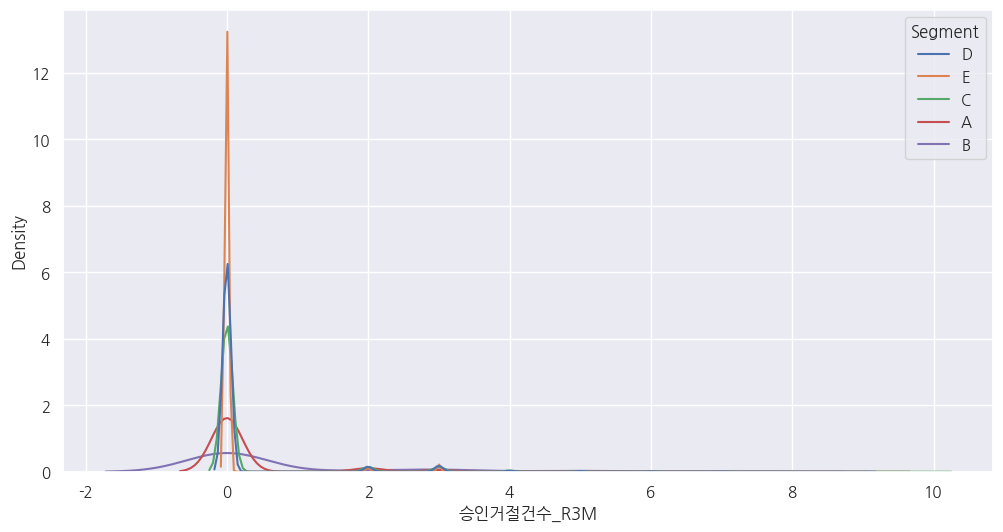

In [785]:
sns.kdeplot(d_train, x=c, hue='Segment', common_norm=False)

<Axes: xlabel='Segment', ylabel='Probability'>

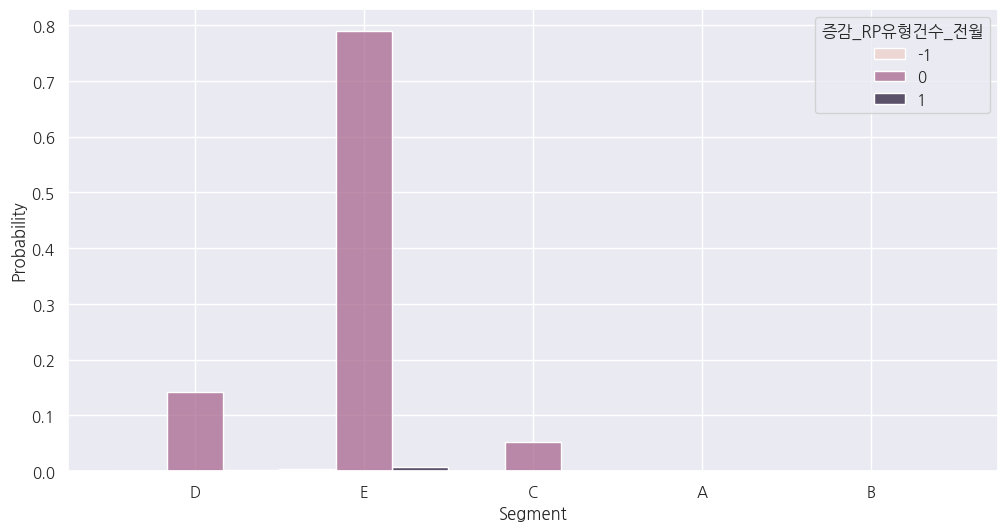

In [459]:
sns.histplot(d_train, x='Segment', hue=c, multiple='dodge', stat='probability')

In [ ]:
sample = d.sample(5000, random_state=42)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk p-value: {p}")

Shapiro-Wilk p-value: 2.8990889537734e-63


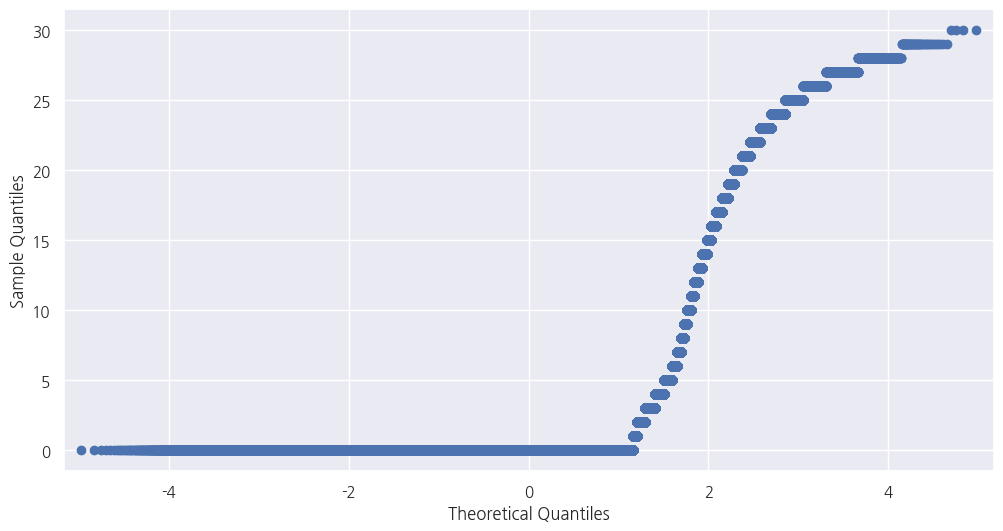

In [ ]:
sm.qqplot(data=d)
plt.show()